In [79]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler
from functions import create_dataset2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [81]:
df = pd.read_csv("https://raw.githubusercontent.com/DImiTrisXam/algo_project1/main/project3/datasets/nasdaq2007_17.csv", header=None, sep='\t')
# df.head()

N = 5
THRESHOLD = 40

time_array = np.array([x for x in range(len(df.columns))])

In [82]:
# load model trained with whole dataset
model_N = keras.models.load_model("anomaly_model")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


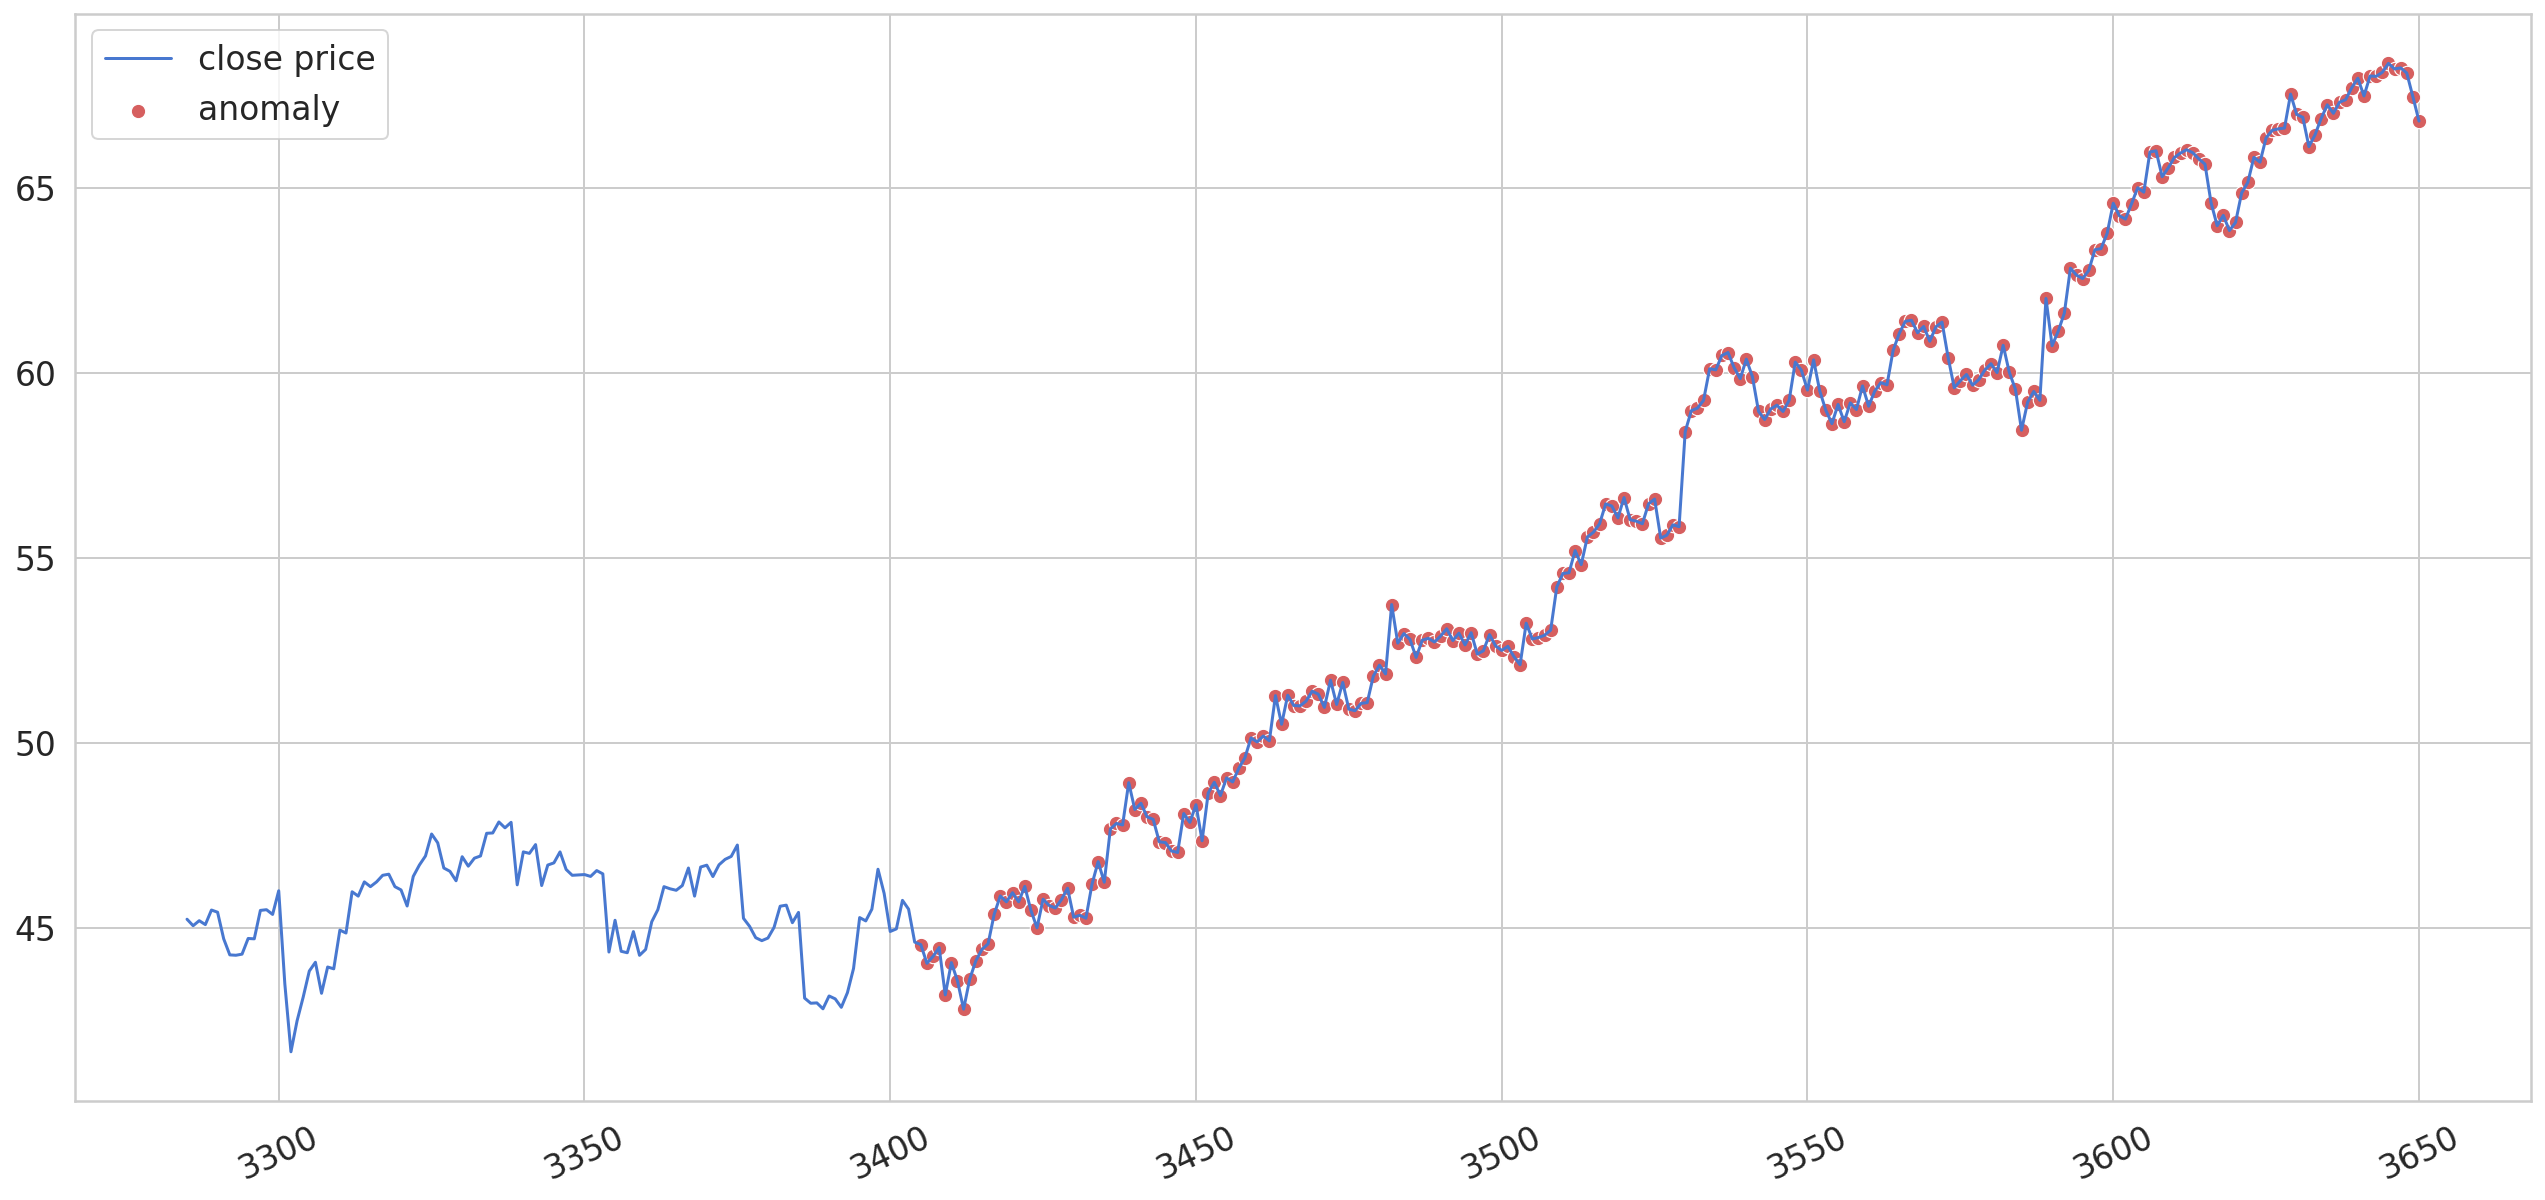

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


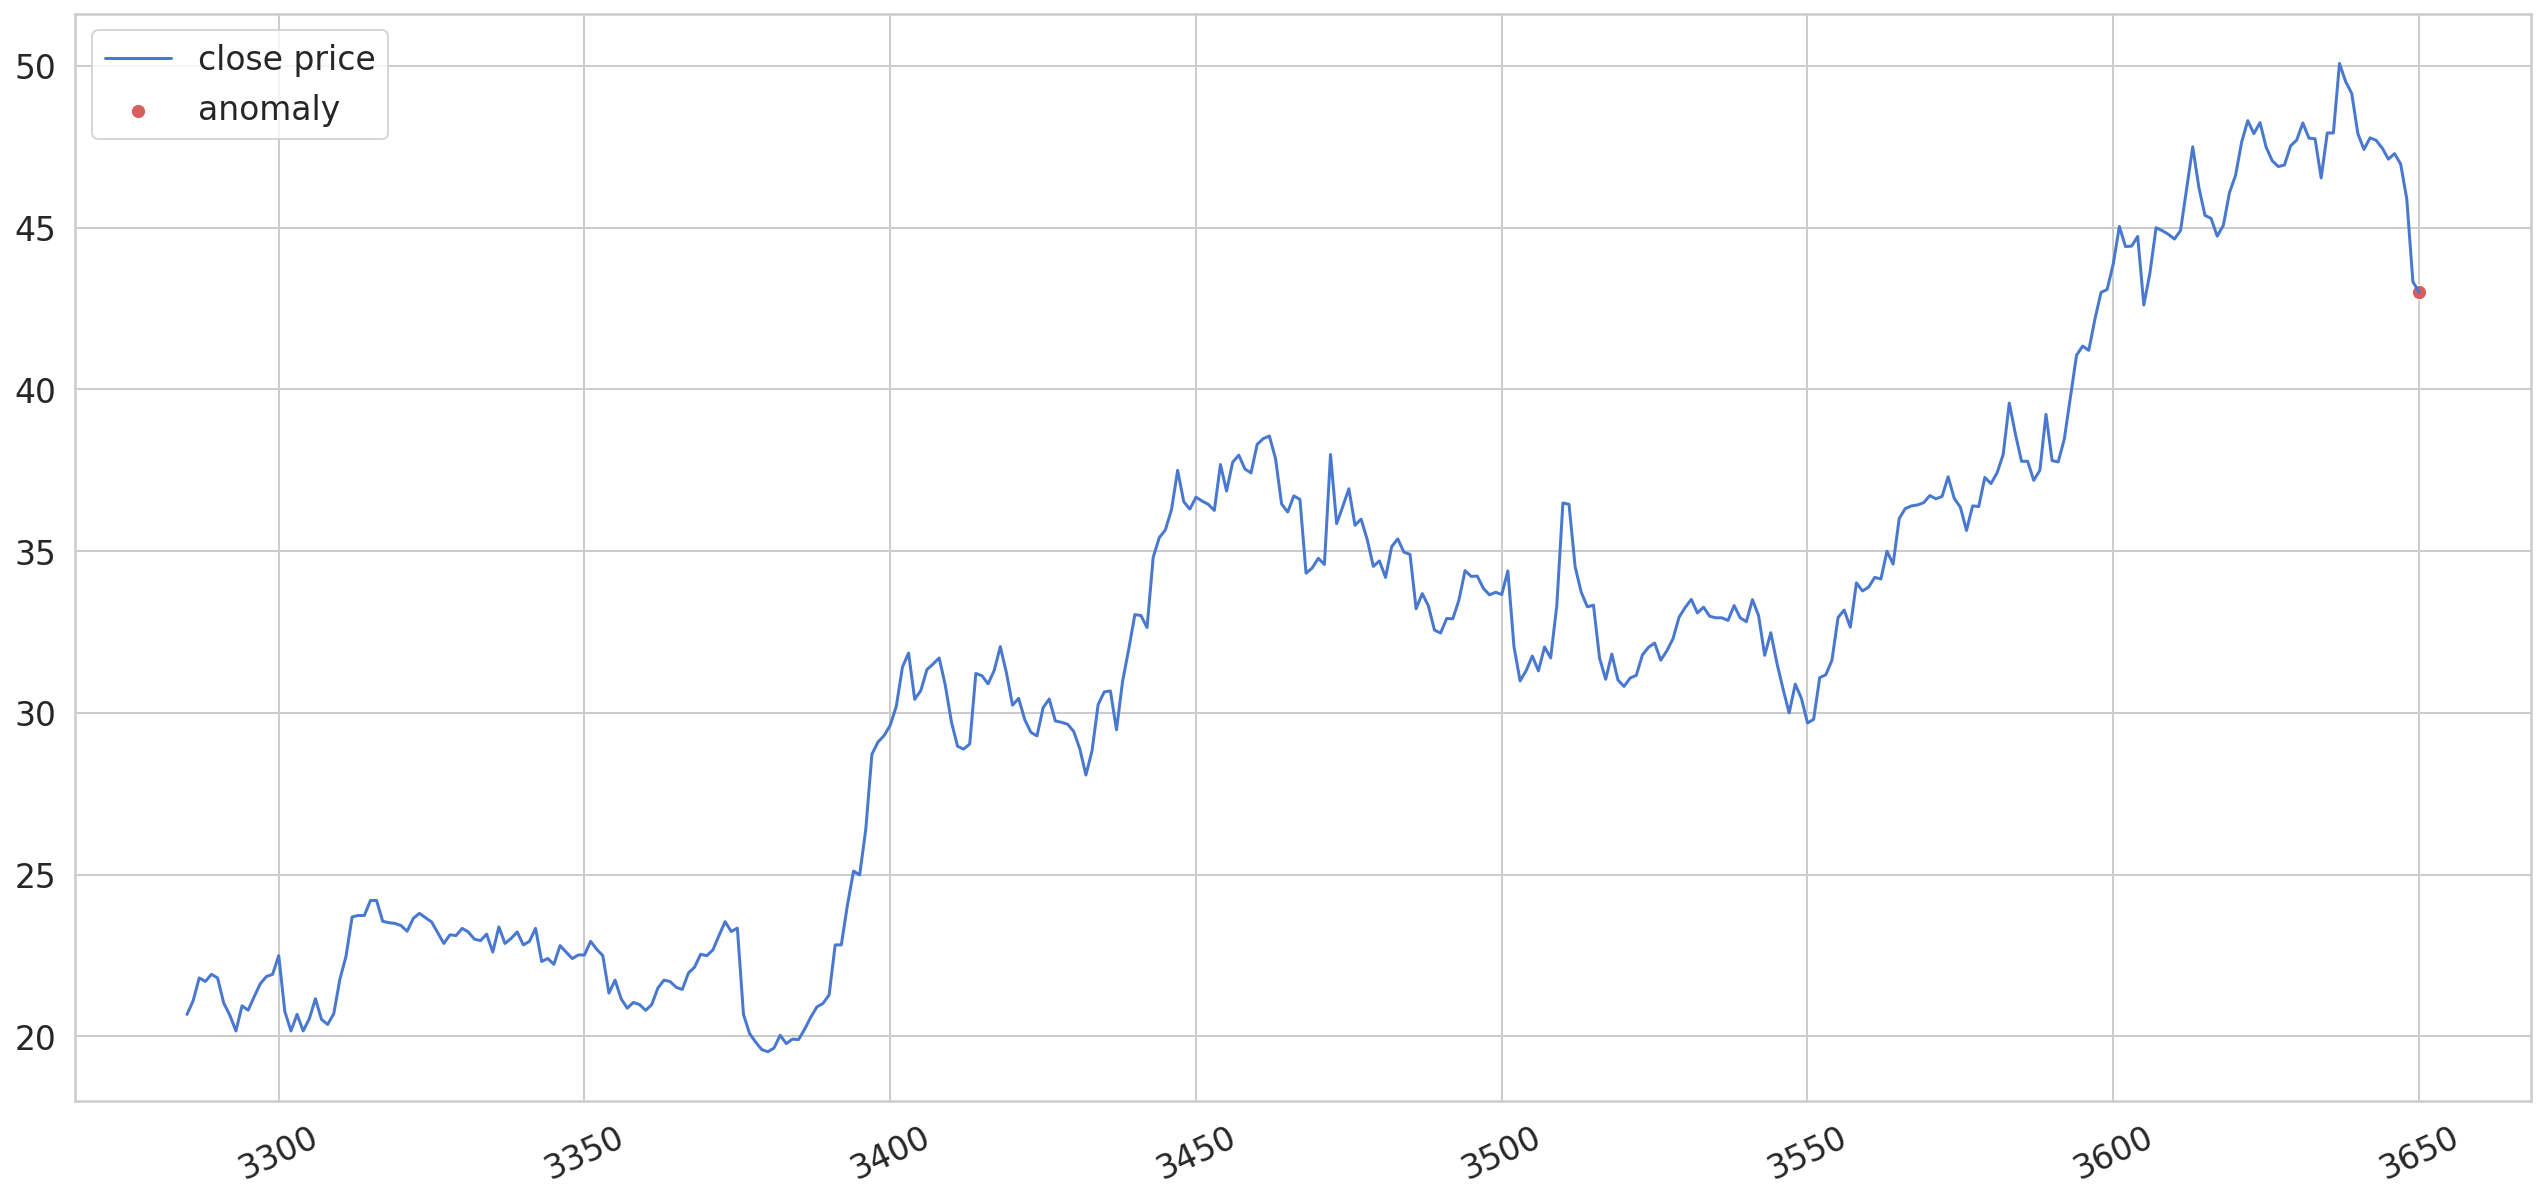

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


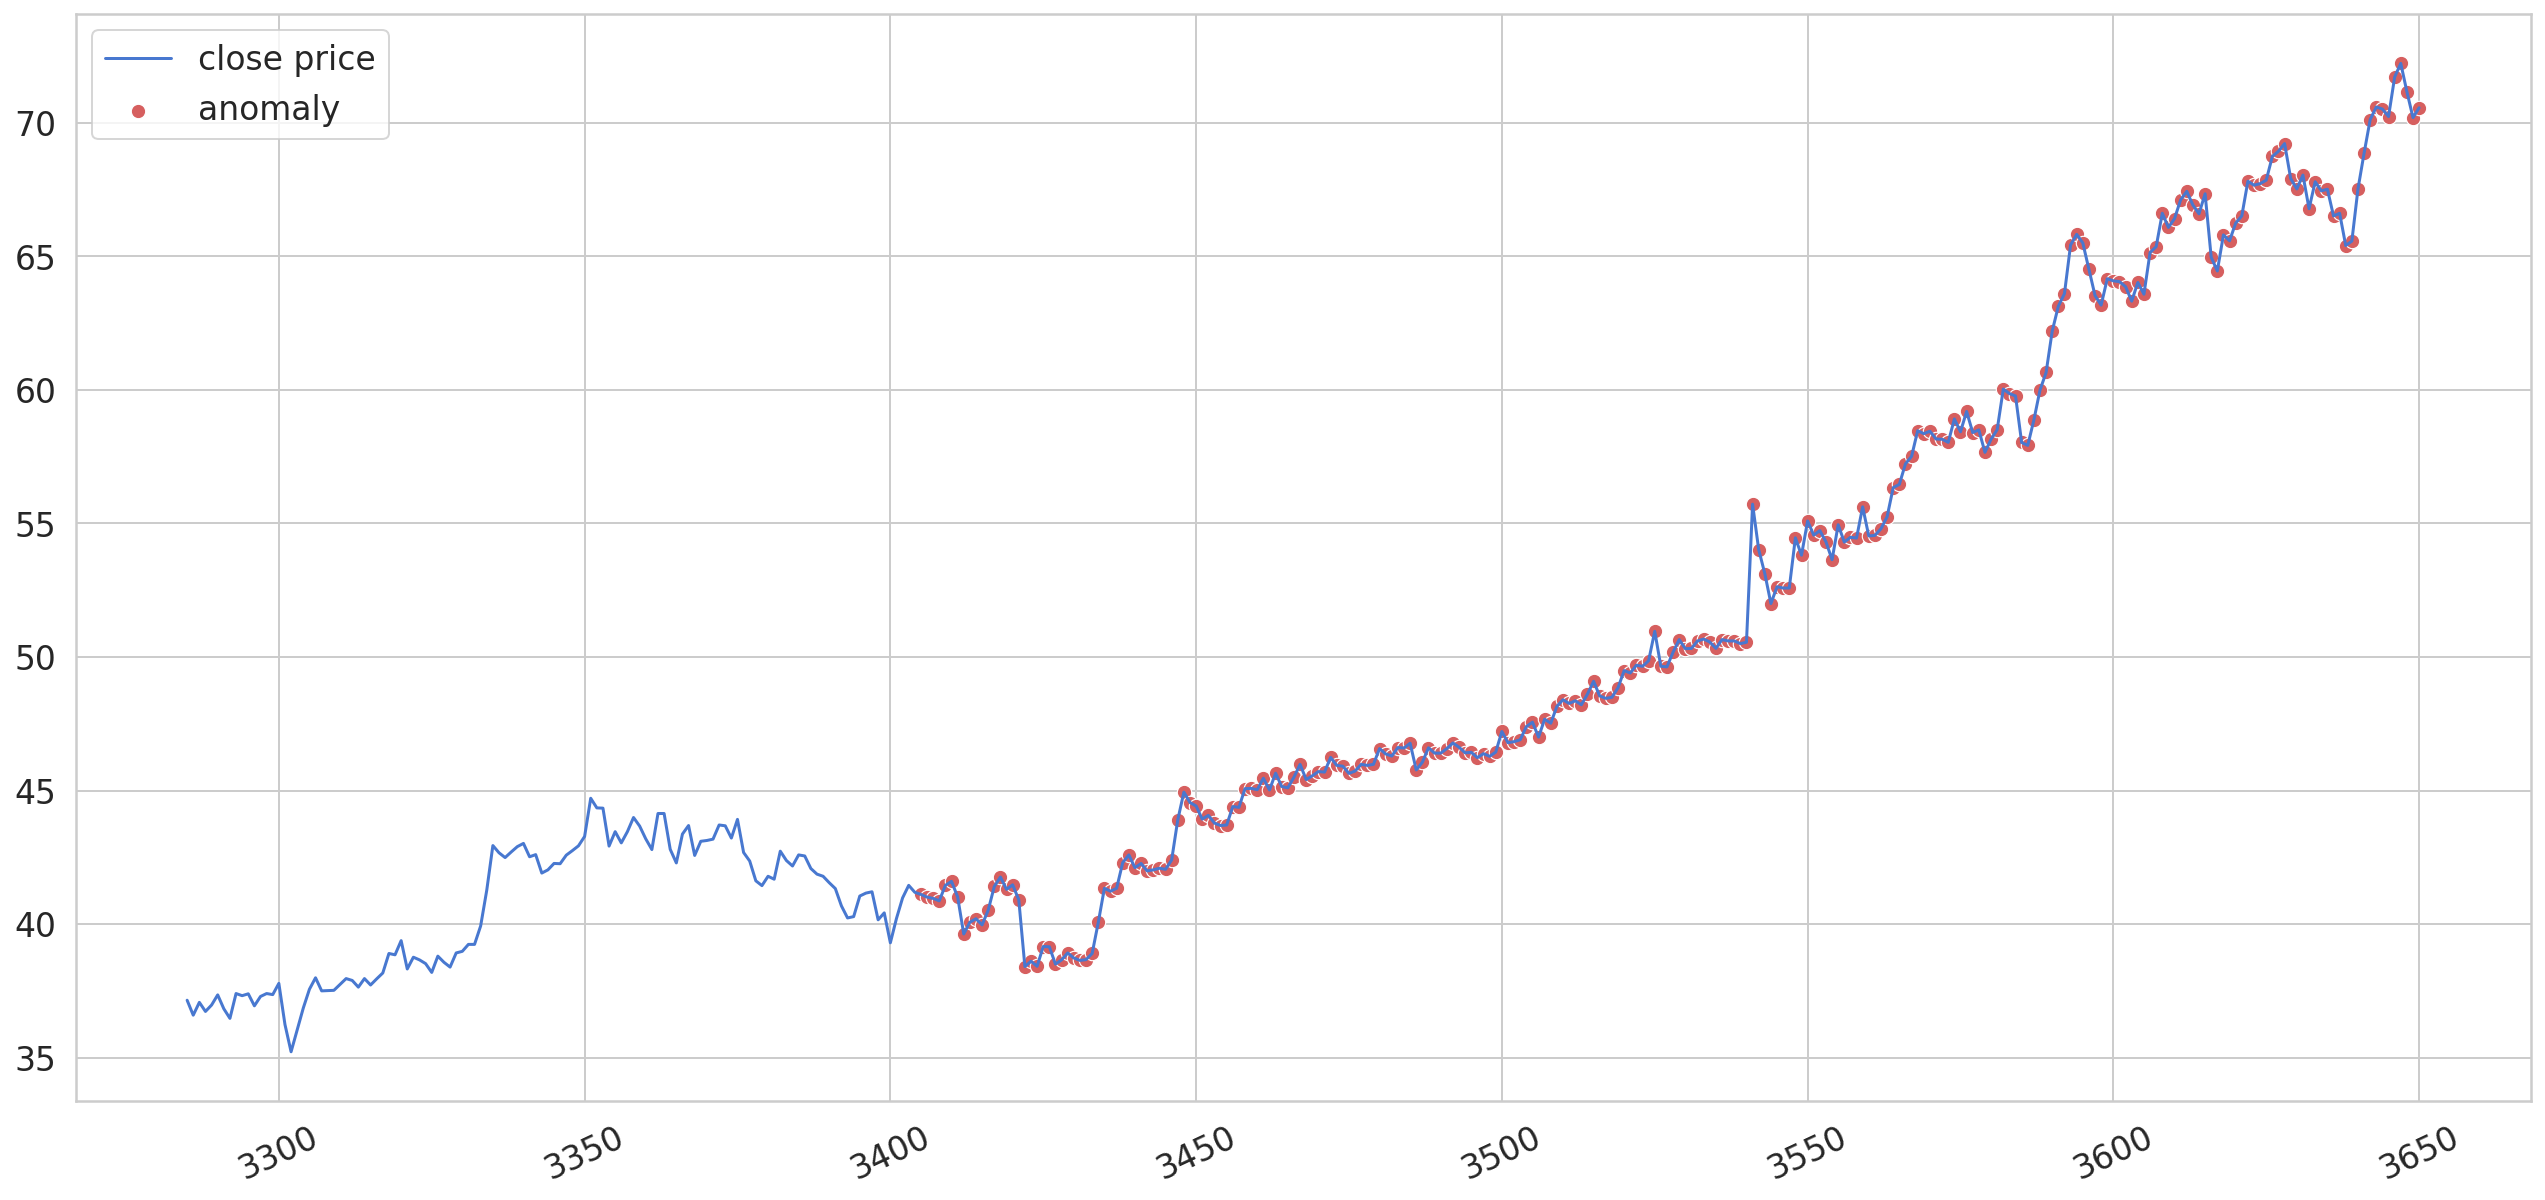

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


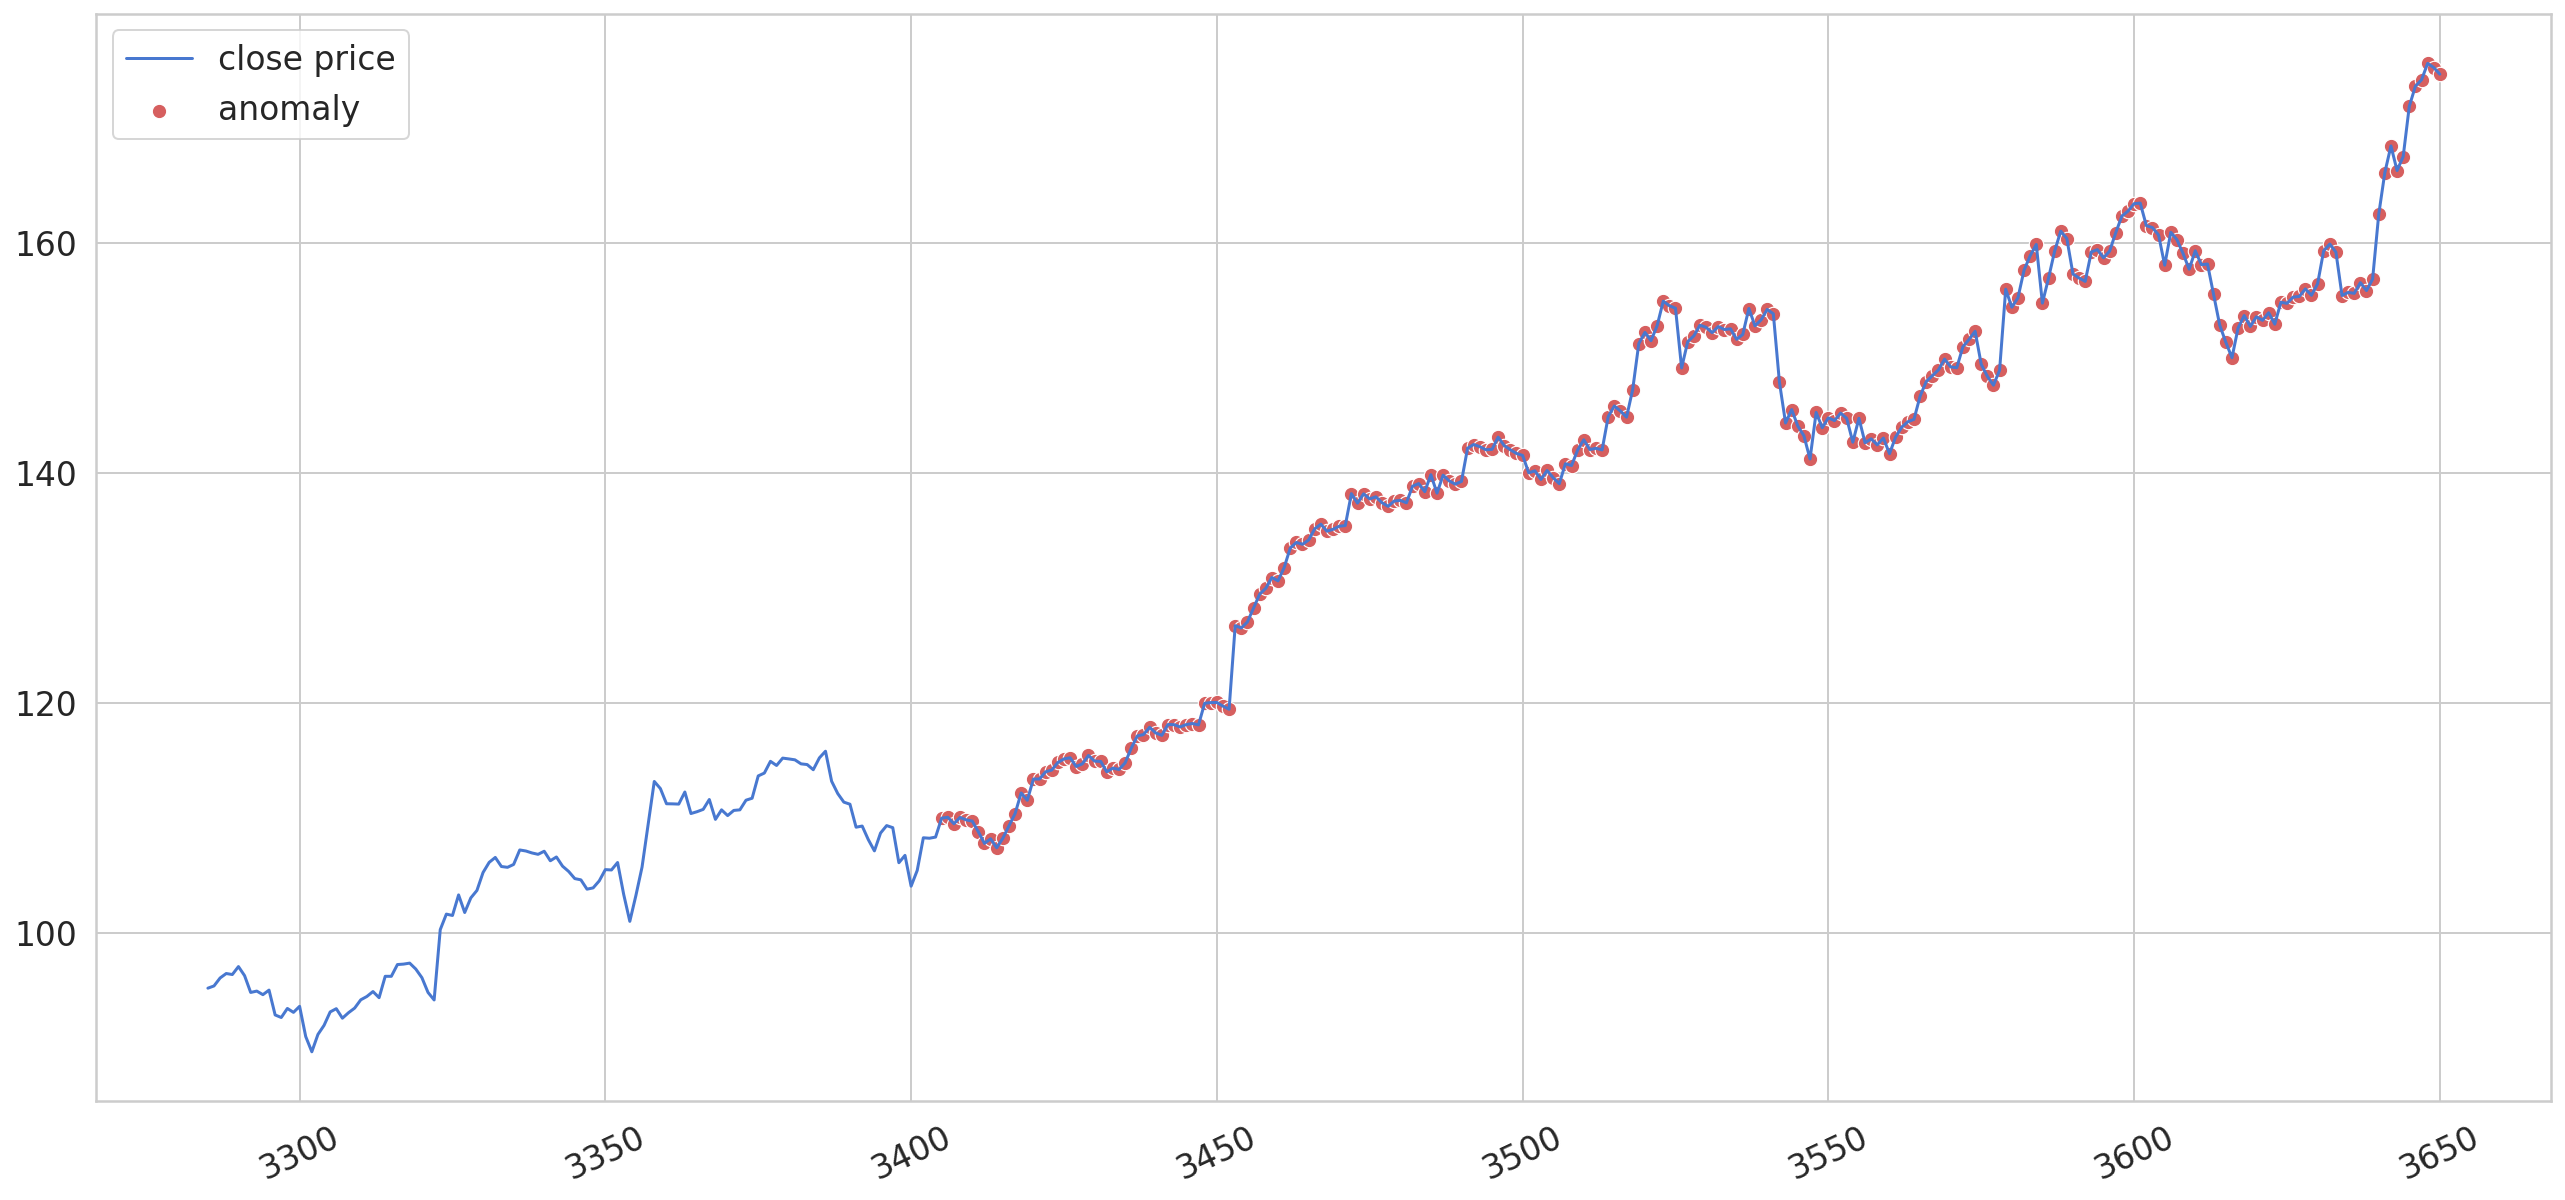

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


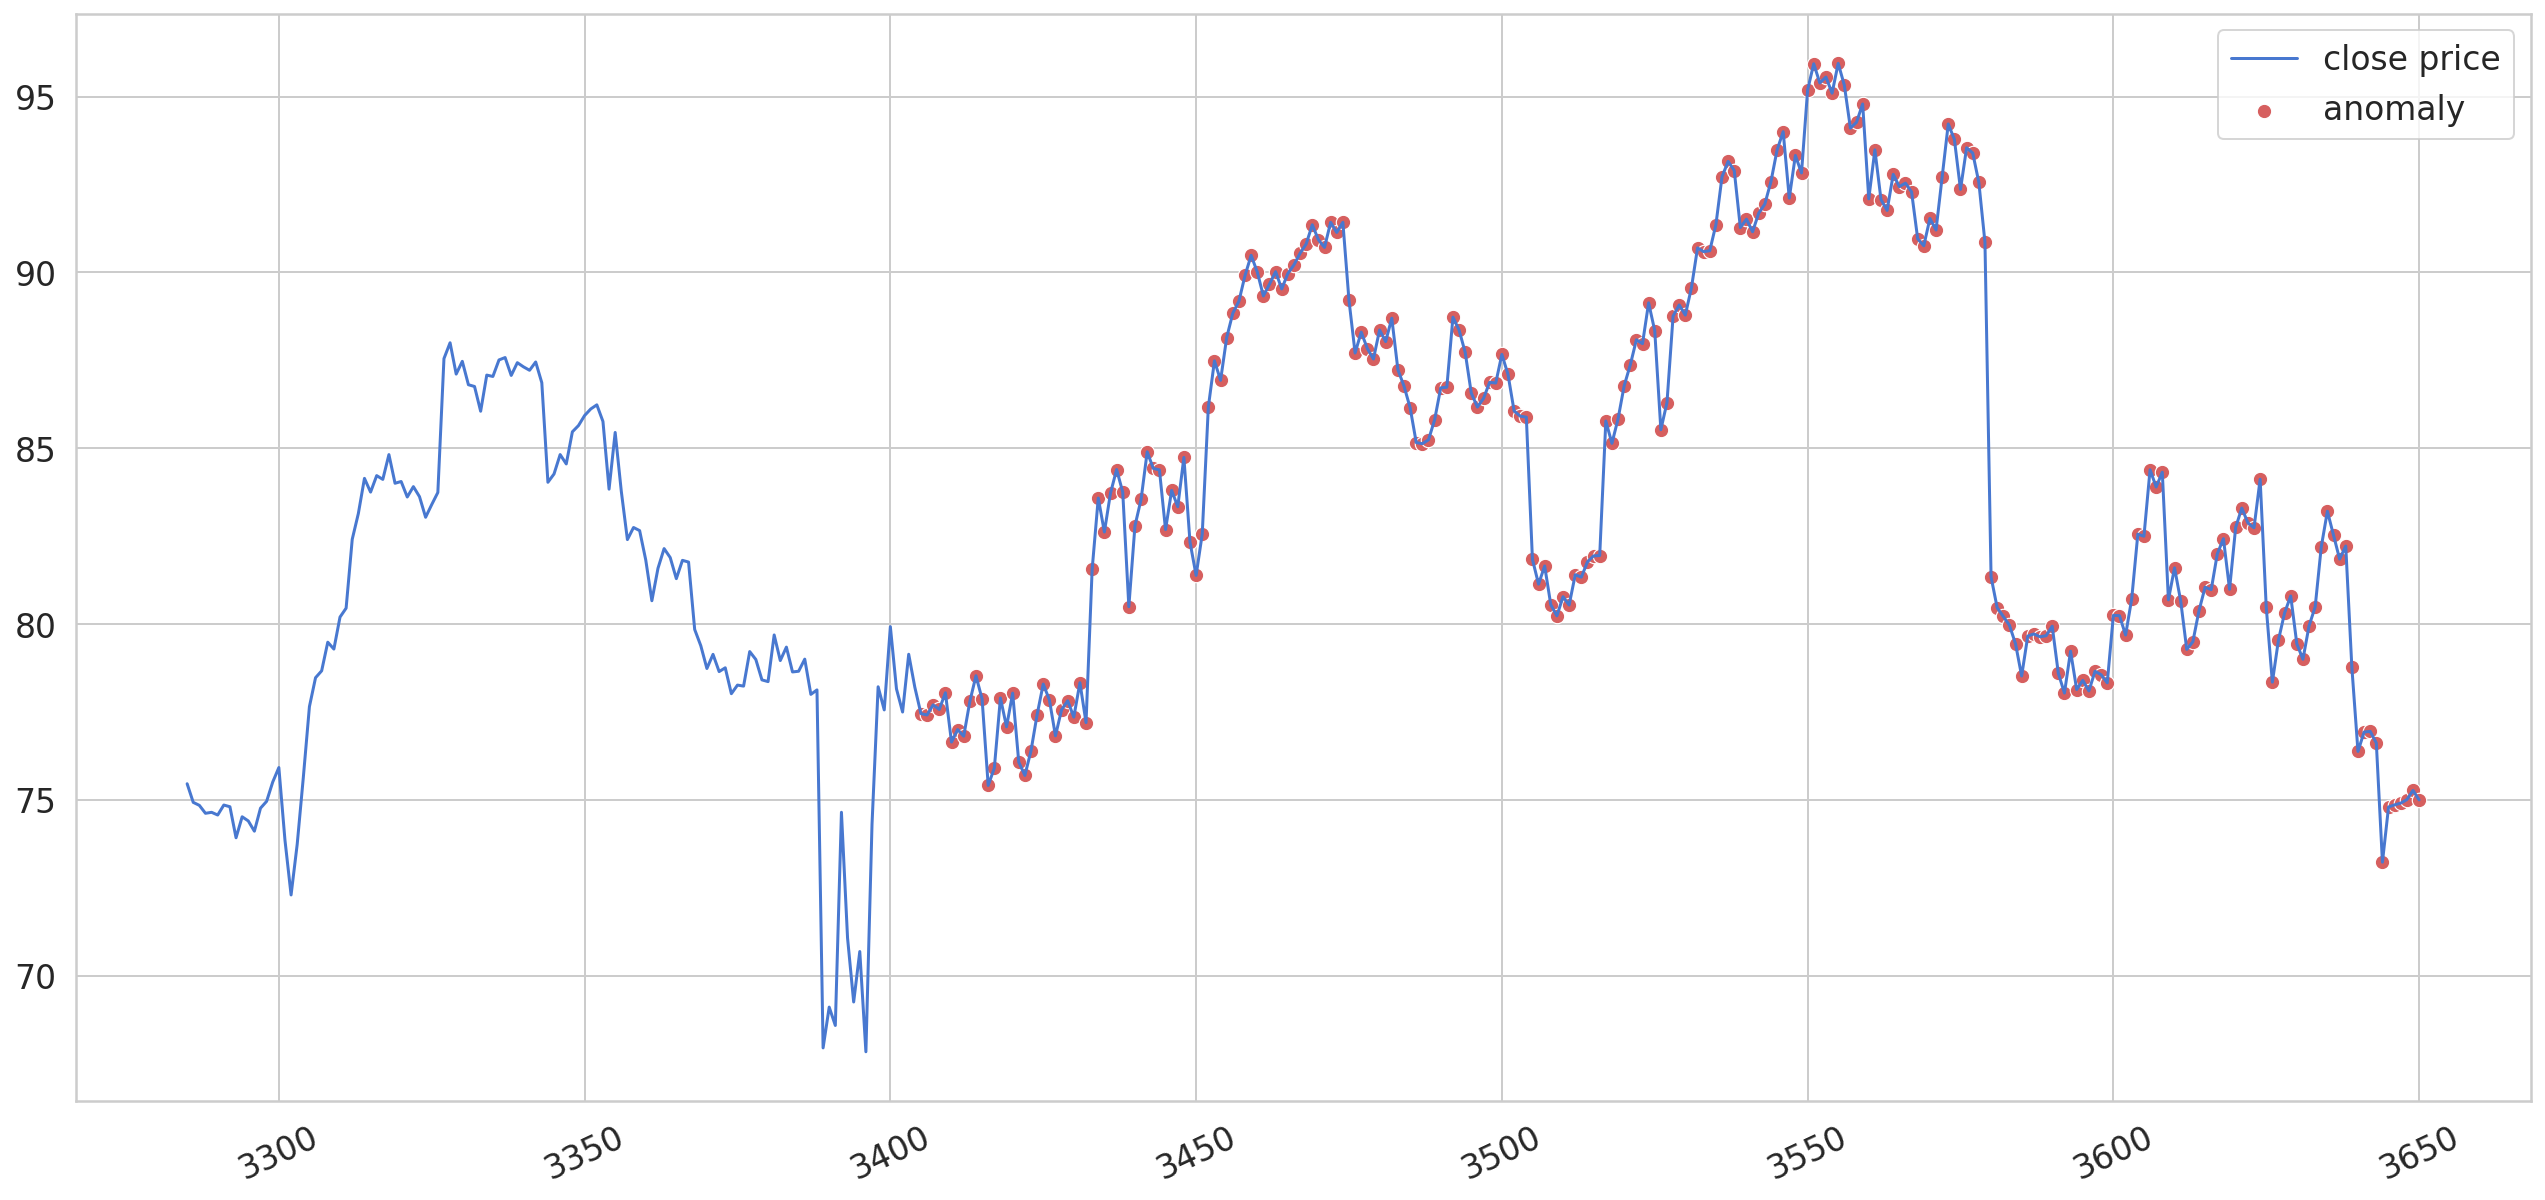

In [83]:
for i in range(N):
    train_size = int(len(df.columns) * 0.9)
    test_size = len(df.columns) - train_size
    train, test = df.iloc[i, 1:train_size].values.reshape(-1, 1), df.iloc[i, train_size:len(df.columns)].values.reshape(-1, 1)
    # print(train.shape, test.shape)

    scaler = StandardScaler()
    scaler = scaler.fit(train)

    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)

    TIME_STEPS = 120

    # reshape to [samples, time_steps, n_features]
    X_train, y_train = create_dataset2(train, train_scaled, TIME_STEPS)
    X_test, y_test = create_dataset2(test, test_scaled, TIME_STEPS)

    scaler = StandardScaler()
    scaler = scaler.fit(train)

    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)

    TIME_STEPS = 120

    # reshape to [samples, time_steps, n_features]
    X_train, y_train = create_dataset2(train, train_scaled, TIME_STEPS)
    X_test, y_test = create_dataset2(test, test_scaled, TIME_STEPS)

    # print(X_train.shape)

    X_train_pred = model_N.predict(X_train)
    train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

    # sns.distplot(train_mae_loss, bins=50, kde=True);

    X_test_pred = model_N.predict(X_test)
    test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

    test_score_df = pd.DataFrame(index=time_array[train_size + TIME_STEPS:])
    test_score_df['loss'] = test_mae_loss
    test_score_df['threshold'] = THRESHOLD
    test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
    test_score_df['close'] = test_scaled[TIME_STEPS:]

    # test_score_df.head()

    # plt.plot(test_score_df.index, test_score_df.loss, label='loss')
    # plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
    # plt.xticks(rotation=25)
    # plt.legend();

    anomalies = test_score_df[test_score_df.anomaly == True]
    # anomalies.head()

    plt.plot(
      time_array[train_size:], 
      scaler.inverse_transform(test_scaled), 
      label='close price'
    );

    sns.scatterplot(
      anomalies.index,
      scaler.inverse_transform(anomalies.close.to_numpy().reshape(-1, 1)).flatten(),
      color=sns.color_palette()[3],
      s=52,
      label='anomaly'
    )
    plt.xticks(rotation=25)
    plt.legend();
    plt.show();